In [12]:
#decision tree
#continuous try all values and find th ebest splitting values for continuous and categorical
import numpy as np
import scipy.stats
import pandas as pd
#X_train=np.random.choice([1,0],(10,6))
#y_train=np.random.choice([1,0],(10,))
refund = np.random.choice(["no","yes"],(20,))
MS = np.random.choice(["Single","Married", "Divorced"],(20,))
TI = np.random.choice(250,20)
cheat = np.random.choice(["no","yes"],(20,))
X_train = [refund, MS, TI]
y_train= pd.array(cheat)

In [13]:
X_train

[array(['yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no',
        'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no'],
       dtype='<U3'),
 array(['Single', 'Single', 'Divorced', 'Single', 'Single', 'Divorced',
        'Married', 'Single', 'Married', 'Divorced', 'Married', 'Single',
        'Single', 'Divorced', 'Single', 'Married', 'Married', 'Divorced',
        'Married', 'Married'], dtype='<U8'),
 array([217, 126,  20, 239, 134, 147, 225, 220,  91,  13,  85, 178, 104,
        168, 109, 245, 138,  14,  17, 154])]

In [14]:
y_train

<StringArray>
['yes',  'no', 'yes',  'no', 'yes',  'no', 'yes', 'yes', 'yes',  'no', 'yes',
 'yes',  'no',  'no',  'no',  'no',  'no', 'yes',  'no',  'no']
Length: 20, dtype: string

In [15]:
y_train = pd.factorize(y_train)[0]

In [16]:
for j,i in enumerate(X_train):
    if type(i[0]) == np.str_:
        X_train[j] = pd.factorize(i)[0]
X_train = np.transpose(X_train)

True
True
False


In [18]:
node = X_train[:,1]
n = len(node)
value,counts = np.unique(node, return_counts=True)
probs = counts / n
ent = 0
ent -= np.sum(probs * np.log2(probs))
print(ent)
gini = 0
gini = 1 - np.sum(probs*probs)
print(gini)
entropy = scipy.stats.entropy(node, base=2)
entropy

1.5588718484453603
0.655


3.5110854081804286

In [20]:
h=set([a for a in X_train[:,1]]) #creates a set of all values in y
best=-1
valueBest=-1
for f in h:
    count=np.sum(X_train[:,1]==f) # counts the sum of all true values for the metric{True or False}
    if count>=best:
        best=count
        valueBest=f
valueBest

0

In [177]:
#checks to see if the node is splittable - creates a set from all the values of y and checks if
# is greater than 1
def isSplittable(y):
    return len(set([a for a in y]))!=1


#need to change in a way it can be binary, numerical, and nominal
#need to calculate entropy and return it
#takes x y and the feature needs to also thake a threshold value to split.
#project the children and split it then compute the entropy for each and the total weighted entropy
def scoref(X,y,f):
    c = bestClass(X[:,f])
    r = y[X[:,f]>=c]
    print(r)
    valuer,countsr = np.unique(r, return_counts=True)
    print(countsr)
    probsr = countsr / len(r)
    entr = 0
    entr -= np.sum(probsr * np.log2(probsr))
    
    l = y[X[:,f]<c]
    valuel,countsl = np.unique(l, return_counts=True)
    probsl = countsl / len(l)
    entl = 0
    entl -= np.sum(probsl * np.log2(probsl))
    
    value,counts = np.unique(y, return_counts=True)
    probs = counts / len(y)
    ent = entr*probs[0] + entl*probs[1]
    return ent

#checks the array for the majority class and then returns the best class values {1 or 0}
def bestClass(y):
    h=set([a for a in y]) #creates a set of all values in y
    best=-1
    valueBest=-1
    for f in h:
        count=np.sum(y==f) # counts the sum of all true values for the metric{True or False}
        if count>=best:
            best=count
            valueBest=f
    return valueBest

def createTree(X,y):
    if X.shape[0]>1 and isSplittable(y): #statements to make sure size is accepable and node is splittable
        best=-19000000
        bestindex=-1
        for i in range(X.shape[1]): #for each index in X
            if len(set([h for h in X[:,i]]))>1: # if the length of the columns is greater than 1
                score=scoref(X,y,i) #pass in the arrays and a column value to scores to generate a value
                print(i, score)
                if best<=score: 
                    best=score
                    bestindex=i
        if bestindex==-1:
            print(y)
            return ('l',bestClass(y)) #leaf node with the class
        else:
            cr=createTree(X[X[:,bestindex]==0],y[X[:,bestindex]==0]) #split right node and create new tree.
            cl=createTree(X[X[:,bestindex]==1],y[X[:,bestindex]==1]) #split left node and create new tree.
            return ('node at', bestindex, 'left child',cr,'right child',cl)
    else:
        return ('l',bestClass(y)) #create leaf node.
    
def inference(T,X):
    return np.array([inference1(T,x) for x in X])


def inference1(T,x):
    (l,c)=T
    if l=='n':
        (index,left,rigth)=c
        if x[index]==0:
            return inference1(left,x)
        else:
            return inference1(rigth,x)
    else:
        return c

In [178]:
T=createTree(X_train,y_train)

[1 1 1 0 0 1 0 1 1 1 1]
[3 8]
0 0.8854706302100657
[0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1]
[ 9 11]
1 0.44674850429451374
[0 1 1 0 1 0 0 0 1 1 1 1]
[5 7]
2 0.9909409404930188


In [179]:
T

('node at', 2, 'left child', ('l', -1), 'right child', ('l', -1))

Correct schould look like ('n', (2, ('l', 0), ('n', (1, ('l', 0), (n, (0, ('l', 0), ('l', 0)))))))

[Text(0.5, 0.9375, 'X[0] <= 0.5\nentropy = 0.993\nsamples = 20\nvalue = [9, 11]'),
 Text(0.3076923076923077, 0.8125, 'X[2] <= 177.5\nentropy = 0.918\nsamples = 9\nvalue = [6, 3]'),
 Text(0.23076923076923078, 0.6875, 'X[2] <= 136.0\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.15384615384615385, 0.5625, 'X[2] <= 15.5\nentropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(0.07692307692307693, 0.4375, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.23076923076923078, 0.4375, 'X[2] <= 18.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(0.15384615384615385, 0.3125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3076923076923077, 0.3125, 'X[2] <= 97.0\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.23076923076923078, 0.1875, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.38461538461538464, 0.1875, 'X[2] <= 121.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3076923076923077, 0.0625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Te

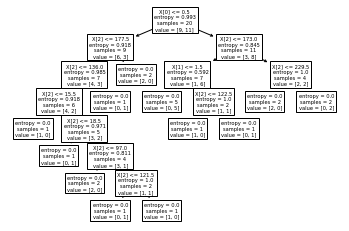

In [139]:
#Tree in sklearn for reference.
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)

In [142]:
y_pred=inference(T,X_train)
y_pred

array([-1, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0,
        0,  0, -1], dtype=int64)

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.67      0.44      0.53         9
           1       0.00      0.00      0.00        11

    accuracy                           0.20        20
   macro avg       0.22      0.15      0.18        20
weighted avg       0.30      0.20      0.24        20



C:\Users\Michael Wendell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michael Wendell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michael Wendell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michael Wendell\anaconda

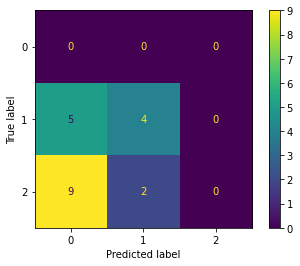

In [141]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_train, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()